# Predicting Road Accident Risk

## Import libraries

In [142]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [143]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

## Explore the data


In [144]:
print(f'Train data has {train_df.shape[0]} rows and {train_df.shape[1]} columns.')
train_df.head()

Train data has 517754 rows and 14 columns.


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [145]:
print(f'Test data has {test_df.shape[0]} rows and {test_df.shape[1]} columns.')
test_df.head()

Test data has 172585 rows and 13 columns.


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [146]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [147]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172585 entries, 0 to 172584
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      172585 non-null  int64  
 1   road_type               172585 non-null  object 
 2   num_lanes               172585 non-null  int64  
 3   curvature               172585 non-null  float64
 4   speed_limit             172585 non-null  int64  
 5   lighting                172585 non-null  object 
 6   weather                 172585 non-null  object 
 7   road_signs_present      172585 non-null  bool   
 8   public_road             172585 non-null  bool   
 9   time_of_day             172585 non-null  object 
 10  holiday                 172585 non-null  bool   
 11  school_season           172585 non-null  bool   
 12  num_reported_accidents  172585 non-null  int64  
dtypes: bool(4), float64(1), int64(4), object(4)
memory usage: 12.5+ MB


In [148]:
# check the value counts of lighting column
train_df['lighting'].value_counts()

lighting
dim         183826
daylight    178015
night       155913
Name: count, dtype: int64

In [149]:
# check the value counts of weather column
train_df['weather'].value_counts()

weather
foggy    181463
clear    179306
rainy    156985
Name: count, dtype: int64

In [150]:
train_df['time_of_day'].value_counts()

time_of_day
morning      173410
evening      172837
afternoon    171507
Name: count, dtype: int64

In [125]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,517754.0,258876.500000,149462.849975,0.0,129438.25,258876.50,388314.75,517753.0
num_lanes,517754.0,2.491511,1.120434,1.0,1.00,2.00,3.00,4.0
curvature,517754.0,0.488719,0.272563,0.0,0.26,0.51,0.71,1.0
speed_limit,517754.0,46.112575,15.788521,25.0,35.00,45.00,60.00,70.0
num_reported_accidents,517754.0,1.187970,0.895961,0.0,1.00,1.00,2.00,7.0
accident_risk,517754.0,0.352377,0.166417,0.0,0.23,0.34,0.46,1.0


In [126]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,172585.0,604046.000000,49821.142441,517754.0,560900.00,604046.00,647192.00,690338.0
num_lanes,172585.0,2.494046,1.119148,1.0,1.00,2.00,3.00,4.0
curvature,172585.0,0.487263,0.272343,0.0,0.26,0.51,0.71,1.0
speed_limit,172585.0,46.102761,15.787077,25.0,35.00,45.00,60.00,70.0
num_reported_accidents,172585.0,1.186059,0.897161,0.0,1.00,1.00,2.00,7.0


In [127]:
# Missing values

print(train_df.isnull().sum().sum())
test_df.isnull().sum().sum()

0


0

In [128]:
# lets check for duplicates
print(f'Train data has {train_df.duplicated().sum()} duplicate rows.')
print(f'Test data has {test_df.duplicated().sum()} duplicate rows.')

Train data has 0 duplicate rows.
Test data has 0 duplicate rows.


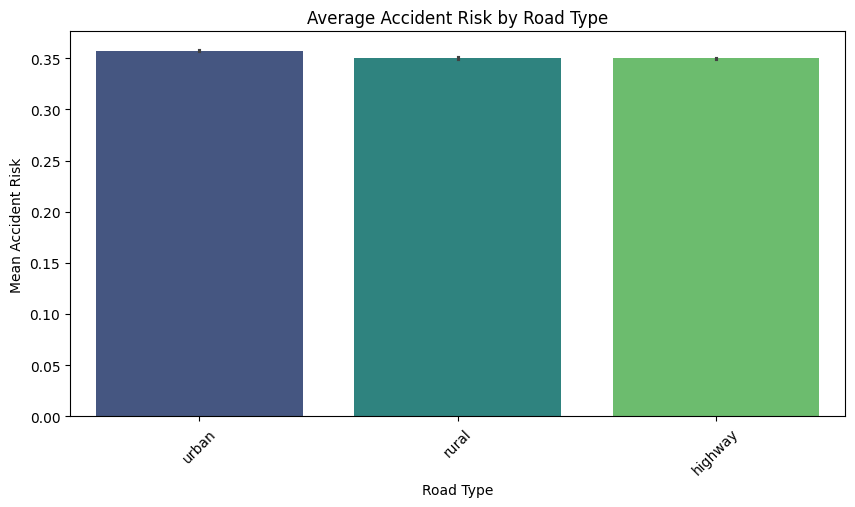

In [129]:
# 1. Accident Risk by Road Type
plt.figure(figsize=(10,5))
sns.barplot(data=train_df, x='road_type', y='accident_risk', estimator='mean', palette='viridis')
plt.title('Average Accident Risk by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Mean Accident Risk')
plt.xticks(rotation=45)
plt.show()

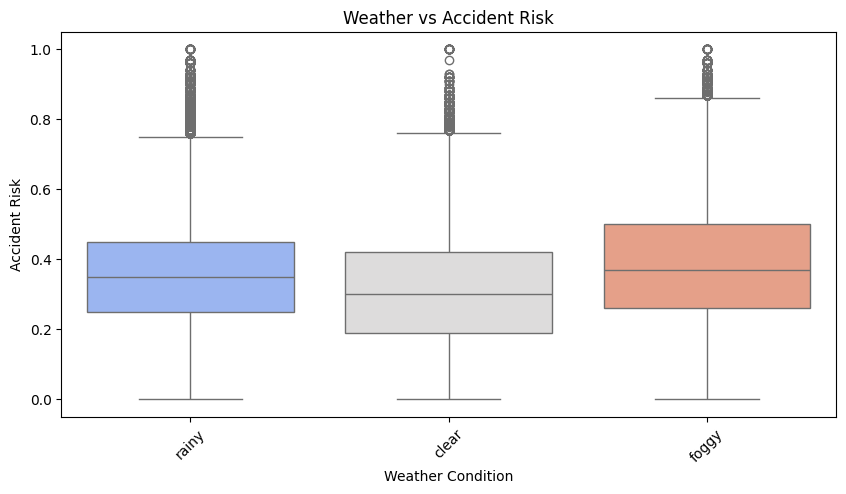

In [130]:
# 2. Weather Impact on Accident Risk
plt.figure(figsize=(10,5))
sns.boxplot(data=train_df, x='weather', y='accident_risk', palette='coolwarm')
plt.title('Weather vs Accident Risk')
plt.xlabel('Weather Condition')
plt.ylabel('Accident Risk')
plt.xticks(rotation=45)
plt.show()

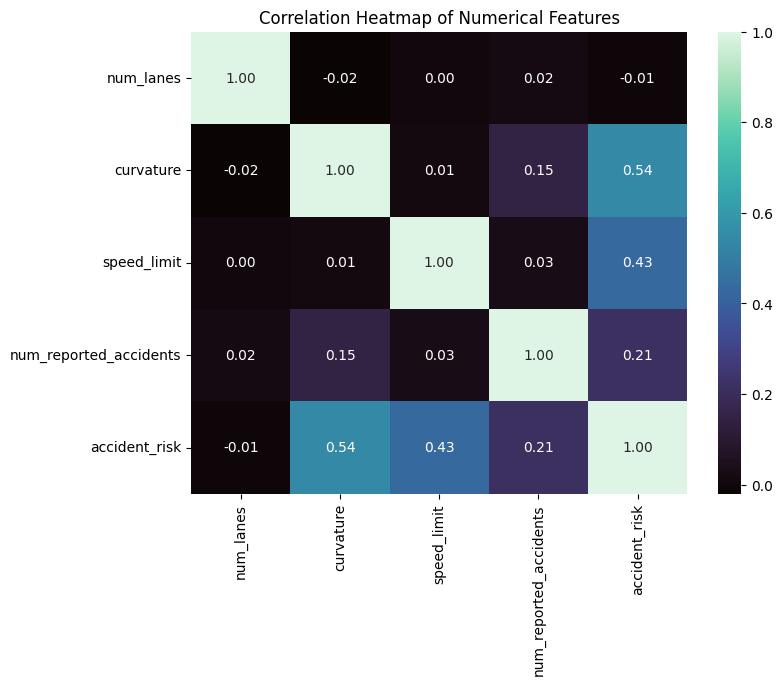

In [131]:
# check weather + time_of_day together
plt.figure(figsize=(8,6))
corr = train_df[['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents', 'accident_risk']].corr()
sns.heatmap(corr, annot=True, cmap='mako', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

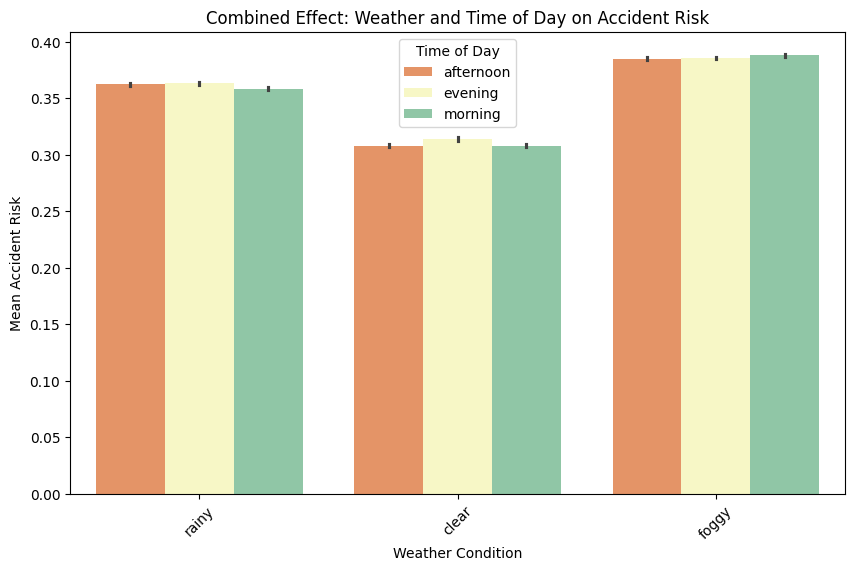

In [132]:
plt.figure(figsize=(10,6))
sns.barplot(data=train_df, x='weather', y='accident_risk', hue='time_of_day', estimator='mean', palette='Spectral')
plt.title('Combined Effect: Weather and Time of Day on Accident Risk')
plt.xlabel('Weather Condition')
plt.ylabel('Mean Accident Risk')
plt.xticks(rotation=45)
plt.legend(title='Time of Day')
plt.show()

## Feature Engineering

In [133]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder dictionary
label_encoders = {}

# Select categorical (object or bool) columns automatically
cat_cols = train_df.select_dtypes(include=['object', 'bool']).columns

# Apply LabelEncoder to each categorical column
for col in cat_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le  # store encoder for later use

# Show first 5 rows
train_df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,2,2,0.06,35,0,2,0,1,0,0,1,1,0.13
1,1,2,4,0.99,35,0,0,1,0,1,1,1,0,0.35
2,2,1,4,0.63,70,1,0,0,1,2,1,0,2,0.30
3,3,0,4,0.07,35,1,2,1,1,2,0,0,1,0.21
4,4,1,1,0.58,60,0,1,0,0,1,1,0,1,0.56


In [134]:
# Apply the same encoding to the test data
for col, le in label_encoders.items():
    test_df[col] = le.transform(test_df[col])

In [135]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['id', 'accident_risk'], axis=1)
y = train_df['accident_risk']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
# Make a copy to avoid overwriting original data
X_train_enc = X_train.copy()
X_valid_enc = X_valid.copy()

for col in cat_cols:
    le = LabelEncoder()
    X_train_enc[col] = le.fit_transform(X_train[col])
    X_valid_enc[col] = le.transform(X_valid[col])

In [137]:
X_train.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
143159,1,2,0.43,60,1,0,0,0,0,1,1,2
20172,0,4,0.18,25,2,0,0,0,0,1,0,1
57926,2,1,0.20,70,2,0,0,1,2,1,1,1
193319,2,3,0.81,60,0,1,1,0,1,1,1,1
213938,1,3,0.43,35,2,2,0,1,2,1,1,2


## Model building

In [138]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score 
import numpy as np


xgb = XGBRegressor(
    random_state=42,
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.1
)

xgb.fit(X_train, y_train)
preds = xgb.predict(X_valid)

mse = mean_squared_error(y_valid, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, preds)

print(f"XGBoost → RMSE: {rmse:.4f} | R²: {r2:.4f}")

XGBoost → RMSE: 0.0562 | R²: 0.8854


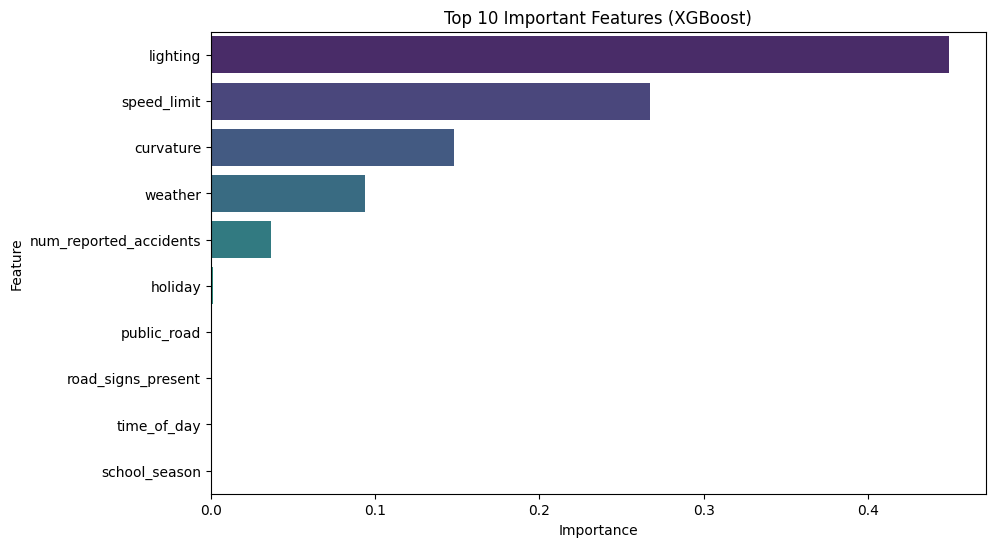

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features (XGBoost)')
plt.show()

In [140]:
test_df

# # Encode same as train
# for col in cat_cols:
#     test[col] = le.transform(test[col])

preds = xgb.predict(test_df.drop(['id'], axis=1))

submission = pd.DataFrame({
    'id': test_df['id'],
    'accident_risk': preds
})

submission.to_csv('submission.csv', index=False)

# Feature Engineering


In [191]:
import pandas as pd
import numpy as np

def feature_engineering(df):
    df = df.copy()
    
    # --- A. Encode time_of_day into categories ---
    time_map = {
        'Early Morning': 'Morning',
        'Morning': 'Morning',
        'Afternoon': 'Day',
        'Evening': 'Night',
        'Night': 'Night',
        'Late Night': 'Night'
    }
    df['time_period'] = df['time_of_day'].map(time_map)
    
    # --- B. Derived numerical features ---
    df['curvature_bin'] = pd.cut(df['curvature'], bins=[-1, 0.1, 0.5, 1.0, 2.0], labels=['Straight', 'Mild', 'Curved', 'Sharp'])
    df['speed_limit_sq'] = df['speed_limit'] ** 2
    df['log_accidents'] = np.log1p(df['num_reported_accidents'])
    
    # --- C. Interaction features ---
    df['speed_curvature'] = df['speed_limit'] * df['curvature']
    df['lanes_public'] = df['num_lanes'] * df['public_road'].astype(int)
    df['holiday_night'] = df['holiday'].astype(int) * (df['time_period'] == 'Night').astype(int)
    
    # Drop ID if present
    if 'id' in df.columns:
        df = df.drop('id', axis=1)
    
    return df

# Apply
train_fe = feature_engineering(train_df)

In [192]:
train_fe = feature_engineering(train_df)
test_fe = feature_engineering(test_df)

In [193]:
train_fe.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk,time_period,curvature_bin,speed_limit_sq,log_accidents,speed_curvature,lanes_public,holiday_night
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13,NaN,Straight,1225,0.693147,2.10,2,0
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35,NaN,Curved,1225,0.000000,34.65,0,0
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30,NaN,Curved,4900,1.098612,44.10,4,0
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21,NaN,Straight,1225,0.693147,2.45,4,0
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56,NaN,Curved,3600,0.693147,34.80,0,0


In [195]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder dictionary
label_encoders = {}

# Select categorical (object or bool) columns automatically
cat_cols = train_fe.select_dtypes(include=['object', 'bool', 'category']).columns

# Apply LabelEncoder to each categorical column
for col in cat_cols:
    le = LabelEncoder()
    train_fe[col] = le.fit_transform(train_fe[col])
    label_encoders[col] = le  # store encoder for later use

# Show first 5 rows
train_fe.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk,time_period,curvature_bin,speed_limit_sq,log_accidents,speed_curvature,lanes_public,holiday_night
0,2,2,0.06,35,0,2,0,1,0,0,1,1,0.13,0,2,1225,0.693147,2.10,2,0
1,2,4,0.99,35,0,0,1,0,1,1,1,0,0.35,0,0,1225,0.000000,34.65,0,0
2,1,4,0.63,70,1,0,0,1,2,1,0,2,0.30,0,0,4900,1.098612,44.10,4,0
3,0,4,0.07,35,1,2,1,1,2,0,0,1,0.21,0,2,1225,0.693147,2.45,4,0
4,1,1,0.58,60,0,1,0,0,1,1,0,1,0.56,0,0,3600,0.693147,34.80,0,0


In [181]:
from sklearn.model_selection import train_test_split

X = train_fe.drop('accident_risk', axis=1)
y = train_fe['accident_risk']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [183]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score 
import numpy as np


xgb = XGBRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8,
        colsample_bytree=0.8, random_state=42, n_jobs=-1
    )

xgb.fit(X_train, y_train)
preds = xgb.predict(X_valid)

mse = mean_squared_error(y_valid, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, preds)

print(f"XGBoost → RMSE: {rmse:.4f} | R²: {r2:.4f}")

XGBoost → RMSE: 0.0563 | R²: 0.8852


In [196]:
# Apply same feature engineering
test_fe = feature_engineering(test_df.copy())

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder dictionary
label_encoders = {}

# Select categorical (object or bool) columns automatically
cat_cols = test_fe.select_dtypes(include=['object', 'bool', 'category']).columns

# Apply LabelEncoder to each categorical column
for col in cat_cols:
    le = LabelEncoder()
    test_fe[col] = le.fit_transform(test_fe[col])
    label_encoders[col] = le  # store encoder for later use

# Show first 5 rows
test_fe.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,time_period,curvature_bin,speed_limit_sq,log_accidents,speed_curvature,lanes_public,holiday_night
0,0,2,0.34,45,2,0,1,1,0,1,1,1,0,1,2025,0.693147,15.30,2,0
1,2,3,0.04,45,1,1,1,0,0,1,0,0,0,2,2025,0.000000,1.80,0,0
2,2,2,0.59,35,1,0,1,0,0,1,1,1,0,0,1225,0.693147,20.65,0,0
3,1,4,0.95,35,0,2,0,0,0,0,0,2,0,0,1225,1.098612,33.25,0,0
4,0,2,0.86,35,0,0,1,0,1,0,1,3,0,0,1225,1.386294,30.10,0,0


In [197]:
train_fe.to_csv('data/trainfe.csv', index=False)
test_fe.to_csv('data/testfe.csv', index=False)

In [175]:
test_fe

test_preds = xgb.predict(test_fe)

submission = pd.DataFrame({
    'id': test_df['id'],
    'accident_risk': test_preds
})

submission.to_csv('submission.csv', index=False)